In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from src.neural_networks.get_data import load_cv_data


2024-08-06 13:02:34.518293: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-06 13:02:34.520841: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-06 13:02:34.564903: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-06 13:02:45.306130: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


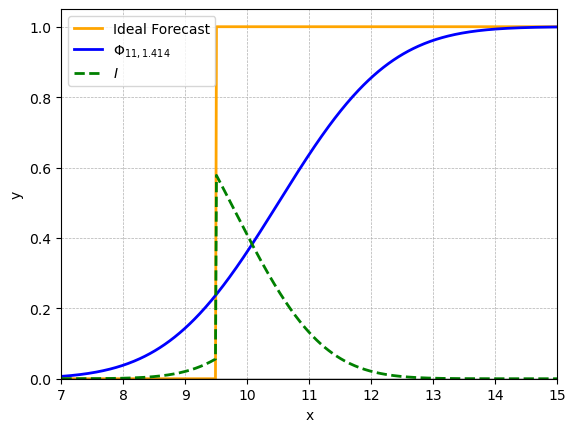

In [23]:
x = np.linspace(7, 15, 500)

observation = 9.5
mean_forecast = 10.5

# Indicator function
indicator = np.where(x > observation, 1, 0)

# Gaussian CDF with mean 9 and variance 2
mean = mean_forecast
variance = 2
gaussian_cdf = norm.cdf(x, loc=mean, scale=np.sqrt(variance))

# Plotting
plt.plot(x, indicator, label=r'Ideal Forecast', color='orange', linewidth=2)
plt.plot(x, gaussian_cdf, label=r'$\Phi_{11,1.414}$', color='blue', linewidth=2)
plt.plot(x, (indicator - gaussian_cdf) ** 2, label=r'$I$', color='green', linewidth=2, linestyle='--')

# Setting labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlim(7, 15)
plt.ylim(0,1.05)
# Adding legend
plt.legend()

# Display the plot
plt.show()


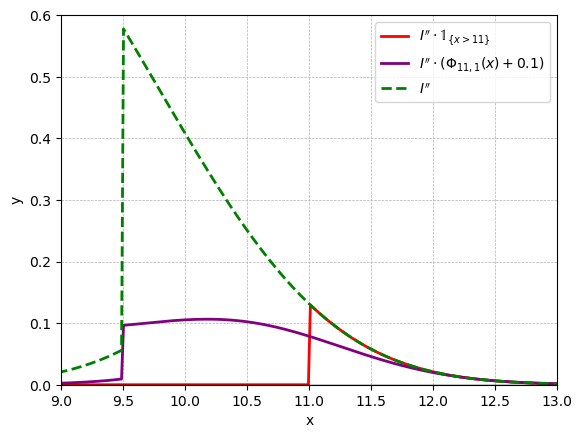

In [25]:
I = (gaussian_cdf - indicator) ** 2

I_ind = np.where(x > 11, 1, 0) * I
I_gauss = I * (norm.cdf(x, loc=11, scale=1) + 0.1)

plt.plot(x, I_ind, label=r'$I^{\prime\prime} \cdot \mathbb{1}_{\{x > 11\}}$', color='red', linewidth=2, linestyle='-')
plt.plot(x, I_gauss, label=r'$I^{\prime\prime} \cdot (\Phi_{11,1}(x) + 0.1)$', color='purple', linewidth=2)
plt.plot(x, I, label=r'$I^{\prime\prime}$' , color='green', linewidth=2, linestyle='--')

# Setting labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.xlim(9, 13)
plt.ylim(0,0.6)
# Adding legend
plt.legend()

# Display the plot
plt.show()

In [3]:
all_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

location_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

scale_features = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']

features_names_dict = {name: 1 for name in all_features}

features_names_dict['wind_speed'] = 15

ignore = ['229', '285', '323']

In [6]:
train_data1, test_data1, ignore = load_cv_data(1, features_names_dict)

train_data2, test_data2, ignore = load_cv_data(2, features_names_dict)

train_data3, test_data3, ignore = load_cv_data(3, features_names_dict)

In [7]:
test_data1 = test_data1.batch(test_data1.cardinality())

test_data2 = test_data2.batch(test_data2.cardinality())

test_data3 = test_data3.batch(test_data3.cardinality())

In [15]:
X, y = next(iter(test_data3))
print(y.shape)

(7780,)


In [16]:
print(np.mean(y))
print(np.quantile(y, 0.9))
print(np.quantile(y, 0.95))
print(np.quantile(y, 0.99))

5.365722
10.289999961853027
12.210000038146973
15.4399995803833
